In [21]:
import pandas as pd
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

import mglearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# 数据表示与特征工程

## 分类变量

### One-hot编码（虚拟变量）

In [75]:
data = pd.read_csv('Data/adult.data', header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                          'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [16]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [17]:
print('Original features: \n', list(data.columns))
data_dummies = pd.get_dummies(data)
print('Features after get_dummies: \n', list(data_dummies.columns))

Original features: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
Features after get_dummies: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [18]:
data_dummies.sample(5)

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
12367,29,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29563,33,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1250,51,50,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
15839,25,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3277,35,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape: {} y.shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Test score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test score: 0.81


c:\Users\19243\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 数据可以编码分类变量

In [46]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                       'Categorical Feature': ['socks', 'fox', 'socks', 'fox']})
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Integer Feature      4 non-null      int64 
 1   Categorical Feature  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [47]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_fox,Categorical Feature_socks
0,0,0,1
1,1,1,0
2,2,0,1
3,1,1,0


In [48]:
# 显式指明编码字段
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,1
1,0,1,0,1,0
2,0,0,1,0,1
3,0,1,0,1,0


In [44]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Integer Feature      4 non-null      object
 1   Categorical Feature  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [45]:
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,1
1,0,1,0,1,0
2,0,0,1,0,1
3,0,1,0,1,0


### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [55]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                       'Categorical Feature': ['socks', 'fox', 'socks', 'fox']})
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Integer Feature      4 non-null      int64 
 1   Categorical Feature  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [56]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(demo_df)

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [61]:
ohe.get_feature_names_out()
# get_feature_names is deprecated in 1.0 and will be removed in 1.2.
# ohe.get_feature_names()

array(['Integer Feature_0', 'Integer Feature_1', 'Integer Feature_2',
       'Categorical Feature_fox', 'Categorical Feature_socks'],
      dtype=object)

In [62]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [86]:
ct = ColumnTransformer(
    [('scaling', StandardScaler(), ['age', 'hours-per-week']),
     ('onehot', OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation', 'income'])]
)

In [89]:
data_transformed = pd.DataFrame(ct.fit_transform(data))
data_features = data_transformed.loc[:, 0:43]
data_target = data_transformed.loc[:, 45]
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data_target, random_state = 0
)
print(X_train.shape)

(24420, 44)


In [92]:
logreg = LogisticRegression(max_iter=1_000)
logreg.fit(X_train, y_train)
print('Test score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test score: 0.81


In [96]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

### Convenient ColumnTransformer creation with `make_columntransformer`

In [98]:
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['wrokclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False))
)

## 分箱、离散化、线性模型与树

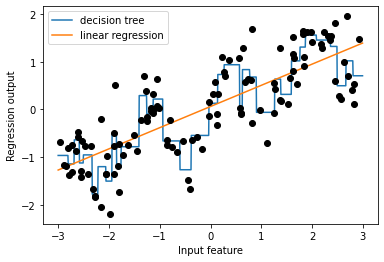

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend()
plt.show()

In [115]:
bins = np.linspace(-3, 3, 11)
print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [118]:
which_bin = np.digitize(X, bins=bins)
print('\nData point:\n', X[:5])
print('\nBin membership for data points: \n', which_bin[:5])


Data point:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [9]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [128]:
X_binned = kb.transform(X)
print(type(X_binned))
X_binned

<class 'scipy.sparse._csr.csr_matrix'>


<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [130]:
print(X[:10])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


In [131]:
X_binned[:10].toarray()

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [5]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
X_binned = kb.fit_transform(X)
X_binned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)
ohe = OneHotEncoder(sparse=False)
ohe.fit(which_bin)
X_binned = ohe.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
print('X_binned.shape: {}'.format(X_binned.shape))

X_binned.shape: (120, 10)


下面我们在 one-hot 编码后的数据上构建新的线性模型和新的决策树模型。

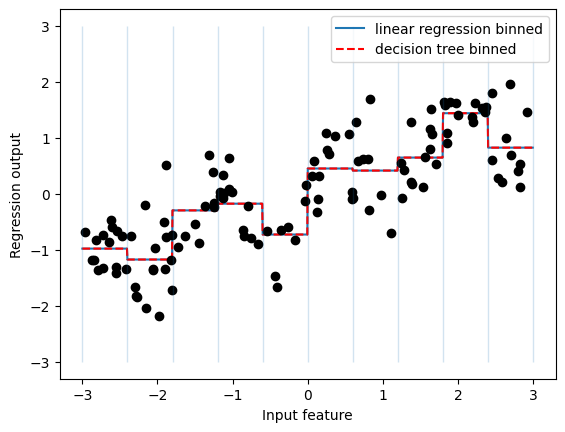

In [14]:
line_binned = ohe.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '-', label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--r', label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.show()

## 交互特征与多项式特征

In [15]:
  X_combined = np.hstack([X, X_binned])
  print(X_combined.shape)

(120, 11)


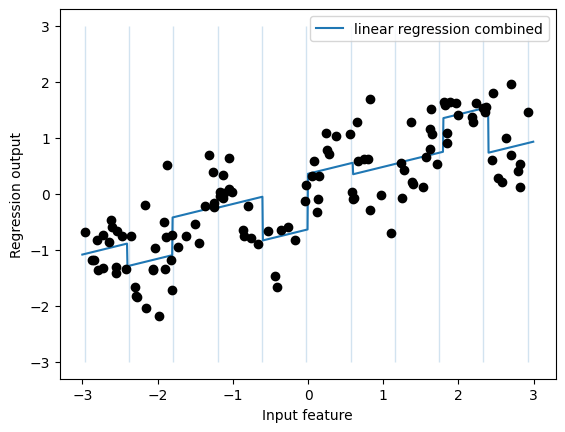

In [19]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

(120, 20)


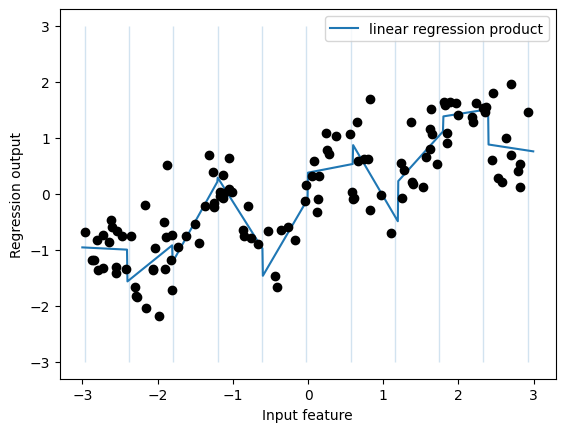

In [30]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)
line_product= np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)

X_poly = poly.fit_transform(X)

print('X_poly.shape: {}'.format(X_poly.shape))

X_poly.shape: (120, 10)


In [44]:
print('Entries of X: \n{}'.format(X[:5]))
print('Entries of X_poly: \n{}'.format(X_poly[:5]))

Entries of X: 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly: 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [51]:
print('Polynomial feature names: \n{}'.format(poly.get_feature_names_out()))

Polynomial feature names: 
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


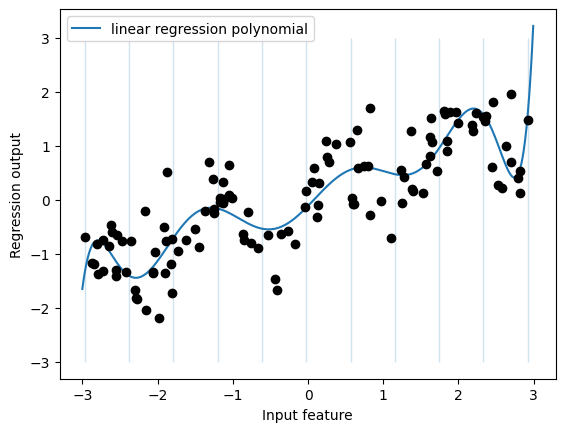

In [54]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly ), label='linear regression polynomial')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

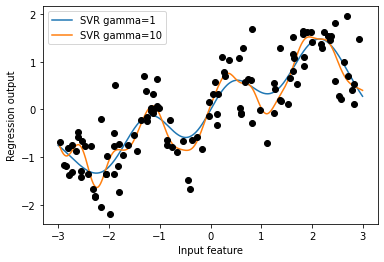

In [8]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('Input feature')
plt.ylabel('Regression output')
plt.legend()
plt.show()

In [14]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 这里 degree=2 的意思是，我们需要由最多两个原始特征的乘积组成的所有特征。
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_poly.shape: {}'.format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`

In [15]:
print('Polynomial feature names: \n{}'.format(poly.get_feature_names_out()))

Polynomial feature names: 
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


In [20]:
ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without interactions: {:.3f}'.format(
    ridge.score(X_test_scaled, y_test)
))
ridge = Ridge().fit(X_train_poly, y_train)
print('Score with interactions: {:.3f}'.format(
    ridge.score(X_test_poly, y_test)
))

Score without interactions: 0.621
Score with interactions: 0.753


In [27]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print('Score without interactions: {:.3f}'.format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Score with interactions: {:.3f}'.format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.789
Score with interactions: 0.754


你可以看到，即使没有额外的特征，随机森林的性能也要优于 Ridge。添加交互特征和多项式特征实际上会略微降低其性能。

## 单变量非线性变换

In [31]:
rng = np.random.RandomState(0)
X_org = rng.normal(size=(1_000, 3))
w = rng.normal(size=(3))

X = rng.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [34]:
print('Number of feature appearances:\n{}'.format(np.bincount(X[:, 0])))
# 数字 2 似乎是最常见的，共出现了 68 次（bincount 始终从 0 开始），更大数字的出现次数快速下降。

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


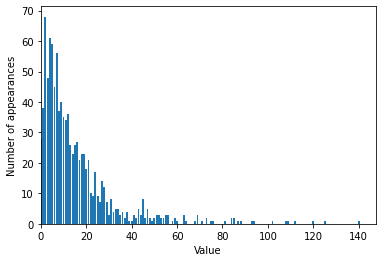

In [39]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins)
plt.ylabel('Number of appearances')
plt.xlim(0)
plt.xlabel('Value')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.622


In [42]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

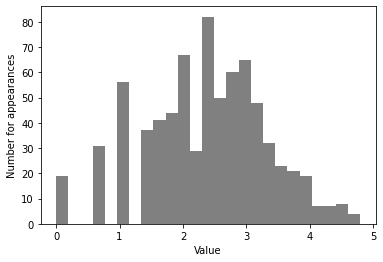

In [45]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel('Number for appearances')
plt.xlabel('Value')
plt.show()

In [47]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.875


## 自动化特征选择

### 单变量统计

### 基于模型的特征选择

### 迭代特征选择

## 利用专家知识